In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

In [4]:
file_names = [
    ('2024-09-11 District A Benchmarks.json', 'a_benchmarks_2024-09-11.json'),
    ('2024-09-11 District A Scores.json', 'a_scores_2024-09-11.json'),
    ('2024-09-11 District A Vendor Student Usage.json', 'a_vendorUsage_2024-09-11.json'),
    ('district.json', 'a_all_2024-08-29.json'),
    ('vendors_202410081500.json', 'a_vendorKey_2024-10-8.json')

]

for old_name, new_name in file_names:
    old_path = os.path.join(data_path, 'raw', old_name)
    new_path = os.path.join(data_path, 'raw', new_name)
    if os.path.exists(old_path) and not os.path.exists(new_path):
        os.rename(old_path, new_path)

In [5]:
with open('data/raw/a_all_2024-08-29.json', 'r') as file:
    data = json.loads(file.read())

with open('data/raw/a_scores_2024-09-11.json', 'r') as file:
    scores_json = json.loads(file.read())

with open('data/raw/a_benchmarks_2024-09-11.json', 'r') as file:
    benchmarks_json = json.loads(file.read())

with open('data/raw/a_vendorUsage_2024-09-11.json', 'r') as file:
    vendorUsage_json = json.loads(file.read())
with open('data/raw/vendors_202410081500.json', 'r') as file:
    vendorKey_json = json.loads(file.read())

In [6]:
scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)


benchmarks_df = pd.DataFrame(benchmarks_json['benchmarks'])
schools_df = pd.DataFrame(data['schools'])
courseSections_df = pd.DataFrame(data['courseSections'])
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])

vendorUsage_data = vendorUsage_json[list(vendorUsage_json.keys())[0]]
vendorUsage_df = pd.DataFrame(vendorUsage_data)

vendorKey_data = vendorKey_json[list(vendorKey_json.keys())[0]]
vendorKey_df = pd.DataFrame(vendorKey_data)

In [7]:
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

processed_dir = os.path.join(data_path, 'processed')
if os.path.exists(processed_dir):
    for file in os.listdir(processed_dir):
        file_path = os.path.join(processed_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

os.makedirs(os.path.dirname(data_path), exist_ok=True)
benchmarks_df.to_csv(os.path.join(data_path, 'processed', 'a_benchmarks_2024-09-11.csv'), index=False)
schools_df.to_csv(os.path.join(data_path, 'processed', 'a_schools_2024-08-29.csv'), index=False)
courseSections_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSections_2024-08-29.csv'), index=False)
courseSectionRosters_df.to_csv(os.path.join(data_path, 'processed', 'a_courseSectionRosters_2024-08-29.csv'), index=False)
scores_df.to_csv(os.path.join(data_path, 'processed', 'a_scores_2024-09-11.csv'), index=False)
vendorUsage_df.to_csv(os.path.join(data_path, 'processed', 'a_vendorUsage_2024-09-11.csv'), index=False)
vendorKey_df.to_csv(os.path.join(data_path, 'processed', 'a_vendorKey_2024-10-8.csv'), index=False)

Mergining dataframes

In [8]:
#Blessing codes of merging dataframes
schools_df = schools_df.rename(columns={'id': 'schoolId'})
courseSections_df = courseSections_df.rename(columns={'id': 'courseSectionId'})
courseSectionRosters_df = courseSectionRosters_df.rename(columns={'id': 'courseSectionRostersId'})
vendorUsage_df = vendorUsage_df.rename(columns={'id': 'vendorId'})
vendorKey_df = vendorKey_df.rename(columns={'id': 'vendorId'})


In [9]:
print("schools: ", schools_df.dtypes)
print("\ncourseSectionRosters: ", courseSectionRosters_df.dtypes)
print("\ncourseSections_df: ", courseSections_df.dtypes)
print("\nvendorUsage_df: ", vendorUsage_df.dtypes)
print("vendorKey_df: ", vendorKey_df.dtypes)


schools:  schoolId                object
name                    object
districtId              object
costCenter              object
abbreviation            object
acqRequestSelectable    object
oneRoster_sourcedId     object
oneRoster_ticketId      object
dtype: object

courseSectionRosters:  courseSectionRostersId    object
courseSectionId           object
studentId                 object
studentLevel              object
ticket                    object
dtype: object

courseSections_df:  courseSectionId    object
vanityId           object
year               object
schoolId           object
dtype: object

vendorUsage_df:  vendorId              int64
vendorId              int64
studentId             int64
active                int64
year                  int64
usageTypeId           int64
weeklyUsageMinutes    int64
dtype: object
vendorKey_df:  vendorId                 int64
name                    object
districtId               int64
vendorNumber            object
acqRequestSelectabl

In [10]:
#changing the dtypes of columns merged on to be the same 
#object-> int64 
courseSectionRosters_df['courseSectionId'] = pd.to_numeric(courseSectionRosters_df['courseSectionId'], errors = 'coerce').astype('int64')
courseSectionRosters_df['studentId'] = pd.to_numeric(courseSectionRosters_df['studentId'], errors = 'coerce').astype('int64')
courseSectionRosters_df['studentLevel'] = pd.to_numeric(courseSectionRosters_df['studentLevel'], errors = 'coerce').astype('int64')

courseSections_df['year'] = pd.to_numeric(courseSections_df['year'], errors = 'coerce').astype('int64')
courseSections_df['courseSectionId'] = pd.to_numeric(courseSections_df['courseSectionId'], errors = 'coerce').astype('int64')



In [11]:
print("schools: ", schools_df.dtypes)
print("\ncourseSectionRosters: ", courseSectionRosters_df.dtypes)
print("\ncourseSections_df: ", courseSections_df.dtypes)
print("\nvendorUsage_df: ", vendorUsage_df.dtypes)
print("vendorKey_df: ", vendorKey_df.dtypes)

schools:  schoolId                object
name                    object
districtId              object
costCenter              object
abbreviation            object
acqRequestSelectable    object
oneRoster_sourcedId     object
oneRoster_ticketId      object
dtype: object

courseSectionRosters:  courseSectionRostersId    object
courseSectionId            int64
studentId                  int64
studentLevel               int64
ticket                    object
dtype: object

courseSections_df:  courseSectionId     int64
vanityId           object
year                int64
schoolId           object
dtype: object

vendorUsage_df:  vendorId              int64
vendorId              int64
studentId             int64
active                int64
year                  int64
usageTypeId           int64
weeklyUsageMinutes    int64
dtype: object
vendorKey_df:  vendorId                 int64
name                    object
districtId               int64
vendorNumber            object
acqRequestSelectabl

In [12]:
merged_df = pd.merge(schools_df, courseSections_df, on=['schoolId'], how='left')

In [13]:
merged_df.head()

,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year
0,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0
1,222,Elementary A,45,5,EES,1,,0,40389.0,READING 4,2015.0
2,222,Elementary A,45,5,EES,1,,0,40390.0,HmroomPK6,2015.0
3,222,Elementary A,45,5,EES,1,,0,40391.0,LANGUAGE 4,2015.0
4,222,Elementary A,45,5,EES,1,,0,40392.0,SCIENCE 4,2015.0


In [14]:
merged_df1 = pd.merge(merged_df, courseSectionRosters_df, on=['courseSectionId'], how='left')

In [15]:
merged_df1.head()

,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year,courseSectionRostersId,studentId,studentLevel,ticket
0,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056839,57871.0,4.0,
1,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056858,44781.0,4.0,
2,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056872,44807.0,4.0,
3,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056891,44810.0,4.0,
4,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056934,44814.0,4.0,


In [16]:
merged_df2 = pd.merge(merged_df1, scores_df, on=['studentId', 'studentLevel', 'year'], how='left')

In [17]:
merged_df2.head()

,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year,courseSectionRostersId,studentId,studentLevel,ticket,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056839,57871.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056858,44781.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056872,44807.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056891,44810.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222,Elementary A,45,5,EES,1,,0,40388.0,PE 4,2015.0,1056934,44814.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merged_df3 = pd.merge(merged_df2, vendorUsage_df, on=['studentId'], how='left')

In [19]:
merged_df3.sample(15)

,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year_x,courseSectionRostersId,studentId,studentLevel,ticket,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,vendorId,vendorId,active,year_y,usageTypeId,weeklyUsageMinutes
1477607,234,Elementary School E,45,62,RES,1,,0,74936.0,HOMEROOM,2017.0,2075563,52120.0,3.0,,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2227.0,1972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173942.0,11333.0,0.0,2019.0,5.0,0.0
1025742,231,Elementary School D,45,35,CES,1,,0,72744.0,Tech Ed Gr K,2017.0,2034301,54865.0,0.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17312.0,72609.0,0.0,2018.0,1.0,0.0
281575,223,Middle School A,45,8,EMS,1,,0,114847.0,WH-1500H/Adv,2018.0,3266621,55011.0,8.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189095.0,11333.0,0.0,2018.0,1.0,0.0
2837254,248,Instructional Support Services,45,8200,ISS,0,,0,63439.0,District Wide - ISS,2015.0,1496401,52115.0,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163009.0,11333.0,0.0,2018.0,4.0,0.0
3289901,249,General and Administrative,45,8600,GA,0,,0,80316.0,District Wide - GA,2016.0,2450823,49463.0,6.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184635.0,11333.0,0.0,2018.0,1.0,0.0
1115298,232,Intermediate School E,45,42,ARIS,1,,0,40072.0,READING 4,2015.0,1049354,56142.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334479,233,High School C,45,50,SEHS,1,,0,75128.0,Plu

In [20]:
print(merged_df3.columns)
print(merged_df3.shape)
print(merged_df3.dtypes)

Index(['schoolId', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId',
       'courseSectionId', 'vanityId', 'year_x', 'courseSectionRostersId',
       'studentId', 'studentLevel', 'ticket', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantr

In [21]:
#there is 2 year columns, delete one and rename other 
if merged_df3 is not None:  # Check if merged_df3 is not None
    merged_df3.drop(columns=['year_y'], inplace=True) 


In [22]:
merged_df3.columns

Index(['schoolId', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId',
       'courseSectionId', 'vanityId', 'year_x', 'courseSectionRostersId',
       'studentId', 'studentLevel', 'ticket', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantr

Third Grade 2017

In [23]:
Grade3_2017_df = merged_df3[(merged_df3['studentLevel'] == 3) & (merged_df3['year_x'] == 2017)].copy()


In [24]:
Grade3_2017_df.head()

,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year_x,courseSectionRostersId,studentId,studentLevel,ticket,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,vendorId,vendorId,active,usageTypeId,weeklyUsageMinutes
27570,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16758.0,72609.0,0.0,1.0,0.0
27571,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24259.0,11333.0,0.0,5.0,0.0
27572,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173454.0,11333.0,0.0,5.0,0.0
27573,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176984.0,11333.0,0.0,6.0,0.0
27574,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181313.0,11333.0,0.0,6.0,0.0


In [25]:
#cleaning the 3rd Grade dataframe
benchmark_test = list(benchmarks_df[benchmarks_df['level'] == 3]['dataSource'].unique())
benchmark_test.remove('value_aspireReadingScaleScore')
benchmark_test.remove('value_starMath')
print(benchmark_test)

Grade3_2017_df.head(5)

['value_scantronMath', 'value_scantronReading']


,schoolId,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId,courseSectionId,vanityId,year_x,courseSectionRostersId,studentId,studentLevel,ticket,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,vendorId,vendorId,active,usageTypeId,weeklyUsageMinutes
27570,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16758.0,72609.0,0.0,1.0,0.0
27571,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24259.0,11333.0,0.0,5.0,0.0
27572,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173454.0,11333.0,0.0,5.0,0.0
27573,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176984.0,11333.0,0.0,6.0,0.0
27574,222,Elementary A,45,5,EES,1,,0,63474.0,Schoolwide -222sID,2017.0,2403688,54184.0,3.0,,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181313.0,11333.0,0.0,6.0,0.0


In [26]:
#list of columns to drop 
cols_drop = ['name', 'costCenter', 'abbreviation', 'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId', 'vanityId', 'ticket', 'weeklyUsageMinutes']
Grade3_2017_df = Grade3_2017_df.drop(columns=cols_drop)

In [27]:
Grade3_2017_df.head()

,schoolId,districtId,courseSectionId,year_x,courseSectionRostersId,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,vendorId,vendorId,active,usageTypeId
27570,222,45,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16758.0,72609.0,0.0,1.0
27571,222,45,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24259.0,11333.0,0.0,5.0
27572,222,45,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173454.0,11333.0,0.0,5.0
27573,222,45,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176984.0,11333.0,0.0,6.0
27574,222,45,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181313.0,11333.0,0.0,6.0


In [28]:
#filtering to have specific columns 
cols_w_value = Grade3_2017_df.filter(like='value_').columns.tolist()
print(cols_w_value)
cols_w_value.remove('value_scantronMath')
cols_w_value.remove('value_scantronReading')
print(cols_w_value)

Grade3_2017_df = Grade3_2017_df.drop(columns=cols_w_value)
Grade3_2017_df = Grade3_2017_df.drop(columns=['districtId'])


['value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore', 'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading', 'value_actMasteryComposite', 'value_actMasteryReading', 'value_actMasteryMath', 'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 'value_mapMath', 'value_mapEnglish', 'value_mapReading', 'value_mapRLA', 'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore', 'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale', 'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency', 'value_accessCompositeScale', 'value_accesscompositeProficiency', 'val

In [29]:
Grade3_2017_df.head() #cleanned Grade 3

,schoolId,courseSectionId,year_x,courseSectionRostersId,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_scantronMath,value_scantronReading,vendorId,vendorId,active,usageTypeId
27570,222,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,16758.0,72609.0,0.0,1.0
27571,222,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,24259.0,11333.0,0.0,5.0
27572,222,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,173454.0,11333.0,0.0,5.0
27573,222,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,176984.0,11333.0,0.0,6.0
27574,222,63474.0,2017.0,2403688,54184.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,1857.0,181313.0,11333.0,0.0,6.0


In [30]:
Grade3_2017_df.dtypes

schoolId                   object
courseSectionId           float64
year_x                    float64
courseSectionRostersId     object
studentId                 float64
studentLevel              float64
measurementTypeId         float64
subgroup_specialEd        float64
subgroup_lunchStatus      float64
subgroup_gender           float64
subgroup_ethnicity        float64
subgroup_ell              float64
subgroup_bottom25         float64
value_scantronMath        float64
value_scantronReading     float64
vendorId                  float64
vendorId                  float64
active                    float64
usageTypeId               float64
dtype: object

In [31]:
Grade3_2017_df['courseSectionRostersId'] = pd.to_numeric(Grade3_2017_df['courseSectionRostersId'], errors = 'coerce').astype('float64')
Grade3_2017_df['schoolId'] = pd.to_numeric(Grade3_2017_df['schoolId'], errors = 'coerce').astype('float64')


In [32]:
Grade3_2017_df.dtypes

schoolId                  float64
courseSectionId           float64
year_x                    float64
courseSectionRostersId    float64
studentId                 float64
studentLevel              float64
measurementTypeId         float64
subgroup_specialEd        float64
subgroup_lunchStatus      float64
subgroup_gender           float64
subgroup_ethnicity        float64
subgroup_ell              float64
subgroup_bottom25         float64
value_scantronMath        float64
value_scantronReading     float64
vendorId                  float64
vendorId                  float64
active                    float64
usageTypeId               float64
dtype: object

Addressing missing data and duplicates

In [33]:
#addressing duplicates and missing data
missing_counts = Grade3_2017_df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print("Shape: ",Grade3_2017_df.shape)

Missing values in each column:
schoolId                     0
courseSectionId              0
year_x                       0
courseSectionRostersId       0
studentId                    0
studentLevel                 0
measurementTypeId         1485
subgroup_specialEd        1485
subgroup_lunchStatus      1485
subgroup_gender           1485
subgroup_ethnicity        1485
subgroup_ell              1485
subgroup_bottom25         1485
value_scantronMath        1485
value_scantronReading     1485
vendorId                  1570
vendorId                  1570
active                    1570
usageTypeId               1570
dtype: int64
Shape:  (151937, 19)


In [34]:
na_counts =Grade3_2017_df.isna().sum()
print("NaN counts in each column:")
print(na_counts[na_counts > 0])  # Display columns with NaNs

NaN counts in each column:
measurementTypeId        1485
subgroup_specialEd       1485
subgroup_lunchStatus     1485
subgroup_gender          1485
subgroup_ethnicity       1485
subgroup_ell             1485
subgroup_bottom25        1485
value_scantronMath       1485
value_scantronReading    1485
vendorId                 1570
vendorId                 1570
active                   1570
usageTypeId              1570
dtype: int64


In [35]:
Grade3_2017_df_cleaned = Grade3_2017_df.dropna(axis=0)
missing_counts = Grade3_2017_df_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print("Shape: ", Grade3_2017_df_cleaned.shape)

Missing values in each column:
schoolId                  0
courseSectionId           0
year_x                    0
courseSectionRostersId    0
studentId                 0
studentLevel              0
measurementTypeId         0
subgroup_specialEd        0
subgroup_lunchStatus      0
subgroup_gender           0
subgroup_ethnicity        0
subgroup_ell              0
subgroup_bottom25         0
value_scantronMath        0
value_scantronReading     0
vendorId                  0
vendorId                  0
active                    0
usageTypeId               0
dtype: int64
Shape:  (149071, 19)


In [36]:
#find duplicates of studentID

unique_count = Grade3_2017_df_cleaned['studentId'].nunique()
print(unique_count)

811


In [37]:
value_counts = Grade3_2017_df_cleaned['studentId'].value_counts()
print("Count of each unique value:")
print(value_counts)
most_frequent = value_counts[value_counts > 1]
print("Most frequent duplicates (appearing more than once):")
print(most_frequent)

Count of each unique value:
52852.0    260
51509.0    260
52889.0    260
52316.0    260
53286.0    260
53961.0    260
52821.0    260
52243.0    260
52720.0    260
52498.0    260
52652.0    260
50740.0    260
54088.0    260
52045.0    260
52608.0    240
52956.0    240
53075.0    240
51336.0    240
52686.0    240
52687.0    240
52657.0    240
52551.0    240
52724.0    240
52664.0    240
53312.0    240
53217.0    240
52999.0    240
53277.0    240
53039.0    240
52641.0    240
51429.0    240
52634.0    240
52187.0    240
52596.0    240
52745.0    240
52775.0    240
52763.0    240
51354.0    240
54021.0    240
53956.0    240
51337.0    240
53385.0    240
53042.0    240
52559.0    240
51597.0    240
52995.0    240
52977.0    240
52954.0    240
52502.0    240
52910.0    240
52684.0    240
52785.0    240
52787.0    240
52900.0    240
52876.0    240
52872.0    240
52866.0    240
52798.0    240
52797.0    240
52793.0    240
52780.0    240
50851.0    240
55217.0    240
52557.0    240
52778.0    2

In [38]:
Grade3_2017_df_cleaned = Grade3_2017_df_cleaned.drop_duplicates(subset='studentId', keep='first')
print("Shape after dropping duplicates:", Grade3_2017_df_cleaned.shape)

Shape after dropping duplicates: (811, 19)


In [39]:
value_counts = Grade3_2017_df_cleaned['studentId'].value_counts()
print("Count of each unique value:")
print(value_counts)
most_frequent = value_counts[value_counts > 1]
print("Most frequent duplicates (appearing more than once):")
print(most_frequent)

Count of each unique value:
54184.0    1
52968.0    1
53286.0    1
53169.0    1
53084.0    1
53040.0    1
53013.0    1
53008.0    1
52993.0    1
52988.0    1
52986.0    1
52975.0    1
52965.0    1
52886.0    1
52957.0    1
52947.0    1
52944.0    1
52938.0    1
52931.0    1
52928.0    1
52926.0    1
52924.0    1
52922.0    1
52920.0    1
53309.0    1
53417.0    1
53607.0    1
53839.0    1
52625.0    1
52540.0    1
52516.0    1
52319.0    1
52273.0    1
52097.0    1
50734.0    1
50707.0    1
55673.0    1
55635.0    1
55058.0    1
55016.0    1
54909.0    1
54857.0    1
54694.0    1
54198.0    1
54181.0    1
54153.0    1
53933.0    1
53864.0    1
53859.0    1
52896.0    1
52868.0    1
52526.0    1
52613.0    1
52670.0    1
52653.0    1
52651.0    1
52650.0    1
52640.0    1
52638.0    1
52637.0    1
52636.0    1
52623.0    1
52618.0    1
52612.0    1
52867.0    1
52610.0    1
52609.0    1
52606.0    1
52603.0    1
52583.0    1
52579.0    1
52578.0    1
52566.0    1
52558.0    1
52545.0   

In [40]:
Grade3_2017_df_cleaned.describe()

,schoolId,courseSectionId,year_x,courseSectionRostersId,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_scantronMath,value_scantronReading,vendorId,vendorId,active,usageTypeId
count,811.000000,811.000000,811.0,8.110000e+02,811.000000,811.0,811.000000,811.0,811.0,811.0,811.0,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.0,811.000000
mean,230.929716,63481.313194,2017.0,2.409075e+06,52610.225647,3.0,5.003699,0.0,0.0,0.0,0.0,0.0,0.043157,2309.035758,2423.404439,18214.197287,71551.214550,0.0,1.324291
std,4.313486,3.662700,0.0,2.913886e+03,934.796327,0.0,1.000610,0.0,0.0,0.0,0.0,0.0,0.203335,198.394687,292.884061,20719.564587,7986.024707,0.0,0.772771
min,222.000000,63474.000000,2017.0,2.403688e+06,50155.000000,3.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1632.000000,13524.000000,11333.000000,0.0,1.000000
25%,226.000000,63477.000000,2017.0,2.405380e+06,52242.500000,3.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2200.500000,2235.000000,15183.500000,72609.000000,0.0,1.000000
50%,232.000000,63482.000000,2017.0,2.409555e+06,52660.000000,3.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2341.000000,2439.000000,15519.000000,72609.000000,0.0,1.000000
75%,234.000000,63484.000000,2017.0,2.411304e+06,52919.500000,3.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2440.500000,2646.500000,15756.500000,72609.000000,0.0,1.000000
max,235.000000,63485.000000,2017.0,2.412400e+06,58789.000000,3.0,6.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2708.000000,3160.000000,182818.000000,72609.000000,0.0,6.000000


KMeans

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Grade3_2017_df_cleaned)
scaled_df = pd.DataFrame(scaled_data, columns = Grade3_2017_df_cleaned.columns)
scaled_df.head()

,schoolId,courseSectionId,year_x,courseSectionRostersId,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_scantronMath,value_scantronReading,vendorId,vendorId,active,usageTypeId
0,-2.071463,-1.9979,0.0,-1.849849,1.684587,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,-0.741585,-1.935080,-0.070325,0.132536,0.0,-0.419906
1,-2.071463,-1.9979,0.0,-1.849505,0.573499,0.0,0.996308,0.0,0.0,0.0,0.0,0.0,-0.212375,-1.654471,-2.160564,-0.110215,0.132536,0.0,-0.419906
2,-2.071463,-1.9979,0.0,-1.849162,0.439698,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,0.166257,-0.271279,-0.115044,0.132536,0.0,-0.419906
3,-2.071463,-1.9979,0.0,-1.848819,0.315530,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,0.241911,1.303693,-0.119680,0.132536,0.0,-0.419906
4,-2.071463,-1.9979,0.0,-1.848475,0.230967,0.0,0.996308,0.0,0.0,0.0,0.0,0.0,-0.212375,1.412019,0.955218,-0.123109,0.132536,0.0,-0.419906


In [43]:
#figure out the optimum number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    #generate elbow graph 
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

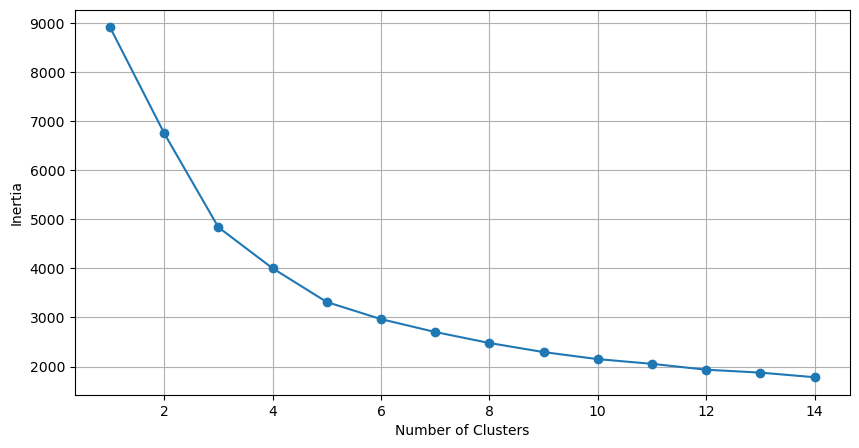

In [44]:
optimise_k_means(scaled_df,15)

PCA

In [45]:
from sklearn.decomposition import PCA


In [46]:
pca = PCA(n_components=2)  # Choose how many components (dimensions) you want to keep
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


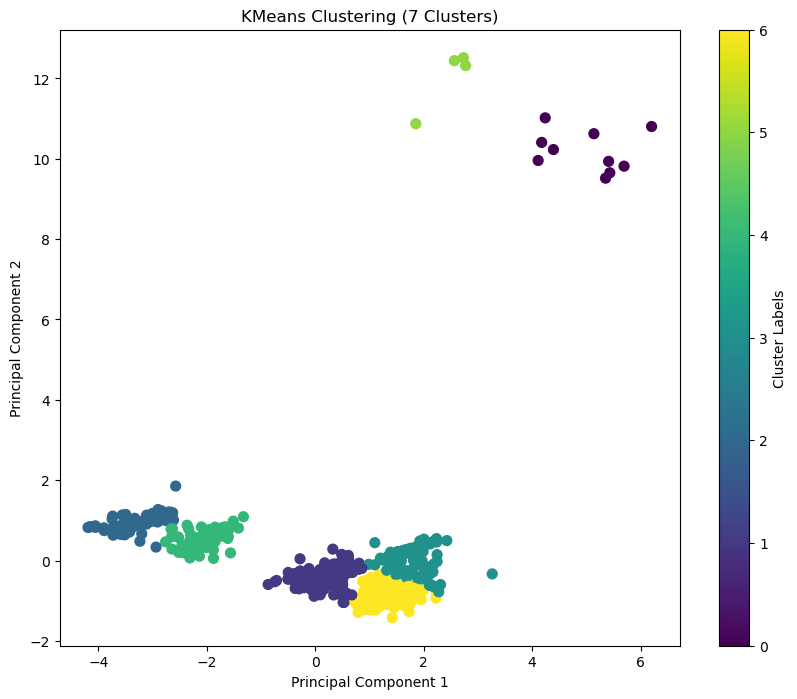

In [47]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(pca_df)
labels = kmeans.labels_
#adding cluster labels 

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (7 Clusters)')

# Show the plot
plt.show()

c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lmmag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


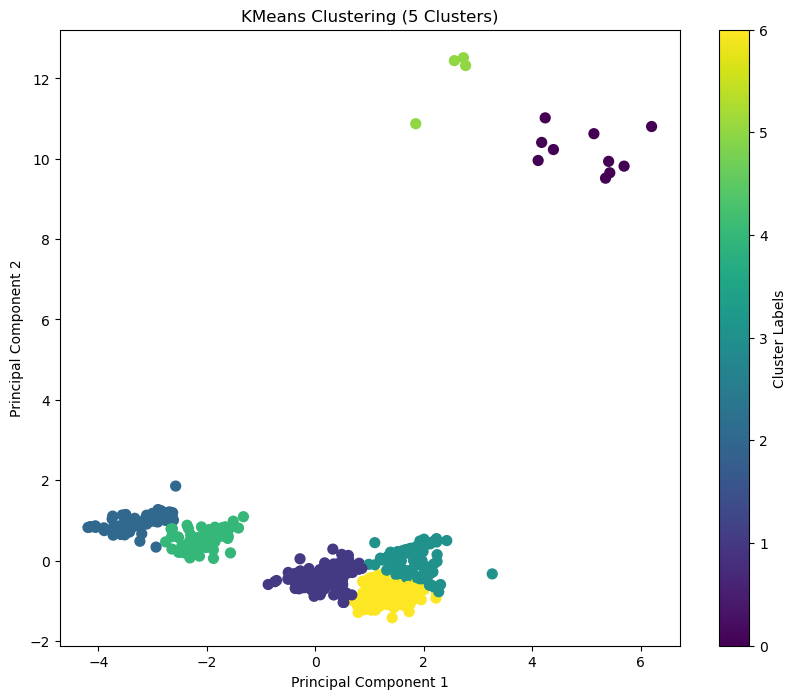

In [48]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)
labels5 = kmeans.labels_
#adding cluster labels 
scaled_df['Cluster5'] = labels5

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (5 Clusters)')

# Show the plot
plt.show()

In [49]:
scaled_df.head()

,schoolId,courseSectionId,year_x,courseSectionRostersId,studentId,studentLevel,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_scantronMath,value_scantronReading,vendorId,vendorId,active,usageTypeId,Cluster5
0,-2.071463,-1.9979,0.0,-1.849849,1.684587,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,-0.741585,-1.935080,-0.070325,0.132536,0.0,-0.419906,0
1,-2.071463,-1.9979,0.0,-1.849505,0.573499,0.0,0.996308,0.0,0.0,0.0,0.0,0.0,-0.212375,-1.654471,-2.160564,-0.110215,0.132536,0.0,-0.419906,0
2,-2.071463,-1.9979,0.0,-1.849162,0.439698,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,0.166257,-0.271279,-0.115044,0.132536,0.0,-0.419906,0
3,-2.071463,-1.9979,0.0,-1.848819,0.315530,0.0,-1.003706,0.0,0.0,0.0,0.0,0.0,-0.212375,0.241911,1.303693,-0.119680,0.132536,0.0,-0.419906,0
4,-2.071463,-1.9979,0.0,-1.848475,0.230967,0.0,0.996308,0.0,0.0,0.0,0.0,0.0,-0.212375,1.412019,0.955218,-0.123109,0.132536,0.0,-0.419906,0


In [50]:
cluster_sizes = scaled_df['Cluster5'].value_counts()
print(cluster_sizes)

4    296
1    289
3    118
0     94
2     14
Name: Cluster5, dtype: int64


In [56]:
scaled_df.groupby(['Cluster5', 'schoolId']).size() #need to add another column proficent or not so I can cluster based on that 

Cluster5  schoolId 
0         -2.071463     93
          -1.143566      1
1          0.248278    273
           0.712226     14
           0.944200      2
2         -1.143566      4
           0.248278      4
           0.712226      1
           0.944200      5
3         -2.071463      2
          -1.143566    116
4          0.248278      2
           0.712226    125
           0.944200    169
dtype: int64

In [51]:
#need to extract the meaning of those cluster. I know that there are
#more students that are less proficent so maybe that is why?

In [52]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Explained variance ratio:", pca.explained_variance_ratio_)
#need to add more PCA because it only explains 51% of the total pariance 

Explained variance ratio: [0.29525226 0.22074241]


In [53]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

#we  have overlapping clusters cursious on those far away is. 


Silhouette Score: 0.12934912304205962
